<a href="https://colab.research.google.com/github/bala-codes/SENTIMENT-ANALYSIS-ON-TWITTER-POSTS-USING-ML-AND-DL/blob/master/codes%20(ML)/Part-2%20-%20TWITTER%20%20-%20Sentiment%20Analysis%20-%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Importing the libraries which are required.

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/TWITTER ANALYSIS - FINAL DATASETS/final_df_tweets_cleaned.csv') # If you have your input file as .csv format
df = pd.DataFrame(df)
df.head()

,label,text_cleaned
0,0,awww bummer shoulda get david carr third day
1,0,upset cannot update facebook texting might cry...
2,0,dive many time ball manage save rest bound
3,0,whole body feel itchy like fire
4,0,behave mad cannot see


In [ ]:
df['text_cleaned'] = df['text_cleaned'].astype(str)
df.shape

(1583691, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['label'], test_size = 0.10, random_state = 123)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1425321,) (1425321,)
(158370,) (158370,)


In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_train)

#this command gives importance for each and every word
print(tfidf_train[0:3])

  (0, 1965907)	0.37397057368586
  (0, 1964963)	0.2274675188413603
  (0, 1647759)	0.41342917337226337
  (0, 1640983)	0.15734871527575303
  (0, 1015736)	0.554799873305042
  (0, 1015327)	0.21927973833206624
  (0, 414232)	0.506789636074724
  (1, 2806837)	0.38537761169176243
  (1, 2804387)	0.16617553593210507
  (1, 2481686)	0.32401648343513495
  (1, 1567681)	0.39245246556547575
  (1, 1561754)	0.15613839460659268
  (1, 1520886)	0.3919851636322628
  (1, 1520557)	0.27665777397391095
  (1, 1103179)	0.2928613503869186
  (1, 1097106)	0.1526938344587649
  (1, 977414)	0.39316408246319473
  (1, 974955)	0.21594421582600254
  (2, 2845823)	0.3141080851881535
  (2, 2844394)	0.12511976559191065
  (2, 2816106)	0.14678180734225263
  (2, 2549886)	0.3533965566391294
  (2, 2549540)	0.17170133872562582
  (2, 2347876)	0.3533965566391294
  (2, 2347870)	0.2691778762206781
  :	:
  (1425318, 526245)	0.37118160907923664
  (1425318, 521199)	0.15009813676136174
  (1425319, 2712808)	0.2810343631712728
  (1425319, 19615

# NAIVE BAYES CLASSIFIER

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=2.0)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Naive Bayes ", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer + Naive Bayes  76.47 %
[[60551 18520]
 [18745 60554]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(1,2, 0.1)
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  1.0
Score:  0.7633137589189872

Alpha:  1.1
Score:  0.7636799898970764

Alpha:  1.2000000000000002
Score:  0.7638946770221633

Alpha:  1.3000000000000003
Score:  0.763919934330997

Alpha:  1.4000000000000004
Score:  0.7641661930921261

Alpha:  1.5000000000000004
Score:  0.7641725074193345

Alpha:  1.6000000000000005
Score:  0.7641156784744585

Alpha:  1.7000000000000006
Score:  0.7642103933825851

Alpha:  1.8000000000000007
Score:  0.7642798509818779

Alpha:  1.9000000000000008
Score:  0.7644503378165056



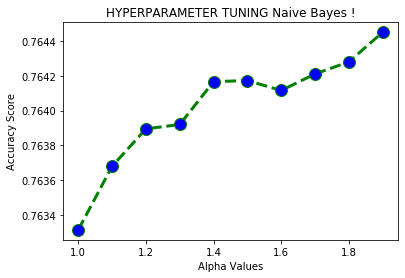

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Naive Bayes !') 
plt.show() 

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, nb_classifier), fout)
print("Model Saved Successfully")

Model Saved Successfully


# BERNOULLI'S BAYES

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=2.0)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Bernoulli's bayes", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer + Bernoulli's bayes 76.586 %
[[58144 20927]
 [16153 63146]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(1,2,0.1)
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  1.0
Score:  0.7643493085811707

Alpha:  1.1
Score:  0.7646397676327588

Alpha:  1.2000000000000002
Score:  0.764803940140178

Alpha:  1.3000000000000003
Score:  0.7649302266843467

Alpha:  1.4000000000000004
Score:  0.7653154006440613

Alpha:  1.5000000000000004
Score:  0.7655048304603145

Alpha:  1.6000000000000005
Score:  0.7655364020963566

Alpha:  1.7000000000000006
Score:  0.765744774894235

Alpha:  1.8000000000000007
Score:  0.7657068889309844

Alpha:  1.9000000000000008
Score:  0.7658773757656122



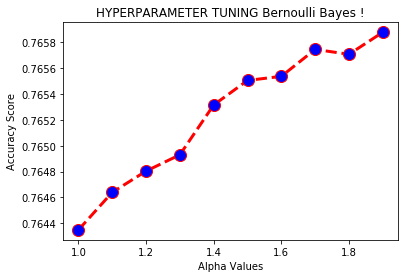

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Bernoulli Bayes !') 
plt.show() 

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/bb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, bb_classifier), fout)
print("Model Saved Successfully")

Model Saved Successfully


# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
%%time
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=450)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Passive Aggressive Classifier", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer + Passive Aggressive Classifier 72.185 %
[[57253 21818]
 [22233 57066]]
CPU times: user 17.6 s, sys: 241 ms, total: 17.8 s
Wall time: 18 s


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]
scores = []
# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.7217781145418956

Alpha:  100
Score:  0.7203637052472059

Alpha:  150
Score:  0.7222516890825282

Alpha:  200
Score:  0.7204394771737072

Alpha:  250
Score:  0.7195554713645261

Alpha:  300
Score:  0.7205847066995011

Alpha:  350
Score:  0.7211719391298858

Alpha:  400
Score:  0.7192081833680621

Alpha:  450
Score:  0.7187093515185957

Alpha:  500
Score:  0.7201995327397865

Alpha:  600
Score:  0.7190061248973921

Alpha:  700
Score:  0.7192460693313127

Alpha:  800
Score:  0.7206289069899602

Alpha:  900
Score:  0.7207615078613374

Alpha:  1000
Score:  0.7202816189934963



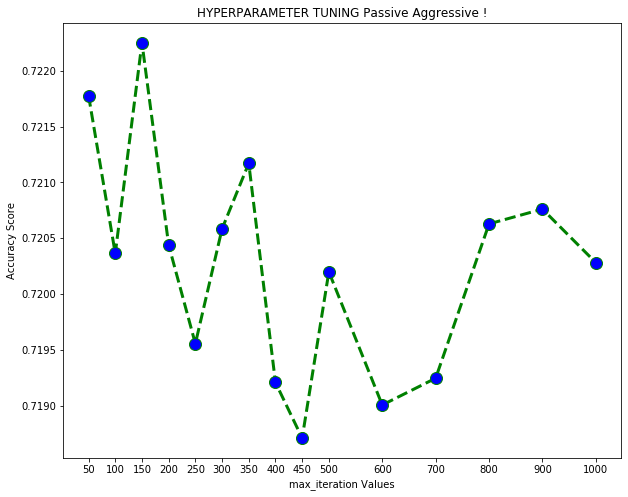

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.figure(figsize=(10,8))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('max_iteration Values') 
plt.ylabel('Accuracy Score')
plt.xticks((50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000))
plt.title('HYPERPARAMETER TUNING Passive Aggressive !') 
plt.show() 

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/PA_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, PA_classifier), fout)
print("Model Saved Successfully")

Model Saved Successfully


# STOCHASTIC GRADIENT DESCENT

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

SGD_classifier = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=10, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGD_classifier.fit(tfidf_train,y_train)
pred = SGD_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Stochastic Gradient Descent ", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

calibrator_classifier = CalibratedClassifierCV(SGD_classifier, cv='prefit')
calibrator_classifier.fit(tfidf_train, y_train)

Score from TFIDF Vectorizer + Stochastic Gradient Descent  76.159 %
[[57998 21073]
 [16684 62615]]


CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='modified_huber',
                                                    max_iter=10,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuf

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/calibrator_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, calibrator_classifier), fout)
print("Model Saved Successfully")

Model Saved Successfully


In [ ]:
%%time
'''
# Run this code once to get the best parameters for SGD Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.
# SGD classifier - finding best parameters using Grid Search CV
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "max_iter" : [5, 10, 20, 50, 100, 1000]
}

model = SGDClassifier()
SGD_classifier = GridSearchCV(model, param_grid=params)
SGD_classifier.fit(tfidf_train, y_train)

print(SGD_classifier.best_score_)
print(SGD_classifier.best_estimator_)   '''

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


'\n# Run this code once to get the best parameters for SGD Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.\n# SGD classifier - finding best parameters using Grid Search CV\nfrom sklearn.model_selection import GridSearchCV\n\nparams = {\n    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],\n    \'alpha\': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],\n    "penalty" : ["l2", "l1", "none"],\n    "max_iter" : [5, 10, 20, 50, 100, 1000]\n}\n\nmodel = SGDClassifier()\nSGD_classifier = GridSearchCV(model, param_grid=params)\nSGD_classifier.fit(tfidf_train, y_train)\n\nprint(SGD_classifier.best_score_)\nprint(SGD_classifier.best_estimator_)   '

# SUPPORT VECTOR MACHINES (LINEAR AND NON LINEAR)

In [ ]:
%%time
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,verbose=0)

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Support Vector Machines ", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer + Support Vector Machines  76.119 %
[[59519 19552]
 [18268 61031]]
CPU times: user 33.2 s, sys: 49.7 ms, total: 33.3 s
Wall time: 33.3 s


In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, SVC_classifier), fout)
print("Model Saved Successfully")

Model Saved Successfully


# LOGISTIC REGRESSION

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_classifier = LogisticRegression(C=1)

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Logistic Regression ", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score from TFIDF Vectorizer + Logistic Regression  77.548 %
[[60297 18774]
 [16783 62516]]
CPU times: user 1min 23s, sys: 17.4 s, total: 1min 40s
Wall time: 1min 17s


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100]
scores = []
# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.7284523584012124

C value:  0.01
Score:  0.7448443518343121

C value:  0.1
Score:  0.7647723685041359

C value:  1
Score:  0.7754814674496432

C value:  10
Score:  0.7650186272652649

C value:  100
Score:  0.7384479383721665



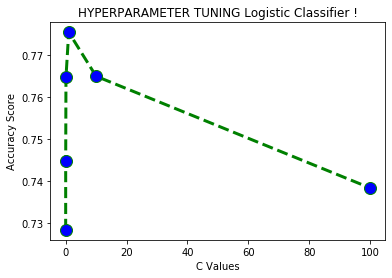

In [ ]:
import matplotlib.pyplot as plt 

x = C
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('C Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Logistic Classifier !') 
plt.show() 

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logreg_classifier), fout)
print("Model Saved Successfully")

Model Saved Successfully


# LOGISTIC REGRESSION CV

In [ ]:
%%time
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

logregcv_classifier = LogisticRegressionCV(Cs=100)

logregcv_classifier.fit(tfidf_train,y_train)
pred = logregcv_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer + Logreg CV", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logregcv_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logregcv_classifier), fout)
print("Model Saved Successfully")

NameError: ignored

# DTC and RANDOM FOREST CLASSIFIERS

In [ ]:
from sklearn import tree
dtc_classifier = tree.DecisionTreeClassifier()

dtc_classifier.fit(tfidf_train,y_train)
pred = dtc_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()

rfc_classifier.fit(tfidf_train,y_train)
pred = rfc_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_classifier = KNeighborsClassifier(n_neighbors = 5) # 3 -> 60 %

knn_classifier.fit(tfidf_train,y_train)
pred = knn_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
print(cm)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = PA_classifier._predict_proba_lr(x)
  pred4 = calibrator_classifier.predict_proba(x)
  pred5 = SVC_classifier._predict_proba_lr(x)
  pred6 = bb_classifier.predict_proba(x)


  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6], axis=0)
  print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred


In [ ]:
pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)

Test_Pred_Prob [[0.76551991 0.23448009]
 [0.53737689 0.46262311]
 [0.97915358 0.02084642]
 ...
 [0.04394646 0.95605354]
 [0.59550538 0.40449462]
 [0.09741112 0.90258888]]


In [ ]:
#FINAL TESTING ACCURACY

score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%") 

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

Score from ENSEMBLE 77.246 %
[[59749 19322]
 [16714 62585]]


In [ ]:
pred = []
pred = ensemble(tfidf_train)
pred = np.array(pred)

Test_Pred_Prob [[0.33576635 0.66423365]
 [0.04172713 0.95827287]
 [0.74306923 0.25693077]
 ...
 [0.6176585  0.3823415 ]
 [0.7819971  0.2180029 ]
 [0.42429709 0.57570291]]


In [ ]:
#FINAL TESTING ACCURACY

score = metrics.accuracy_score(y_train,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%") 

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_train,pred)
print(cm)


Score from ENSEMBLE 89.707 %
[[631608  79506]
 [ 67204 647003]]
